<a href="https://colab.research.google.com/github/KajariBhaumik/BasketballShootingAnalysis/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Basketball_computer_vision

/content/drive/My Drive/Basketball_computer_vision


In [3]:
%ls

 all_images/   frame_images/    'Nic Claxton'/   openpose/     test/          yolov8n.pt
 datasets/     multiple_shots/   notebook/       SpinVideos/   ultralytics/   yolov8s.pt


In [4]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [7]:
# os.listdir('SpinVideos')
print(len(os.listdir('SpinVideos')))

43


In [ ]:
for f in os.listdir('SpinVideos')[:-2]:
  vdo_path = os.path.join('SpinVideos',f)
  test = cv2.VideoCapture(vdo_path)

  vdo_name = f.split(' ')[2].split('.')[0]
  frame_folder_path = f"frame_images/{vdo_name}"
  os.mkdir(frame_folder_path)

  c=0
  while True:
    ret, frame= test.read() #ret= if the image is read then it will be true; if it can not read the image, "ret" will be false
    if ret == False:
      break


    if c%10==0:
      file_name1 = f"frame_images/{vdo_name}/image_{c}.png"
      file_name2= f"all_images/image_{vdo_name}_{c}.png"
      cv2.imwrite(file_name1, frame)
      cv2.imwrite(file_name2, frame)

    c=c+1


In [9]:
fps_list = []
frame_counts = []

# Iterate over video files in the directory
for f in os.listdir('SpinVideos'):
    vdo_path = os.path.join('SpinVideos', f)
    # Check if the path is a file (to avoid directories)
    if os.path.isfile(vdo_path):
        cap = cv2.VideoCapture(vdo_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_counts.append(total_frames)
        fps_list.append(fps)
        cap.release()

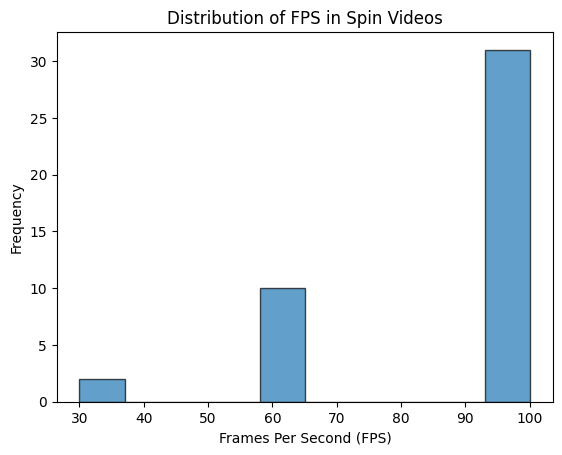

In [10]:
# Create a histogram to visualize the FPS distribution
plt.hist(fps_list, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of FPS in Spin Videos')
plt.xlabel('Frames Per Second (FPS)')
plt.ylabel('Frequency')
plt.show()

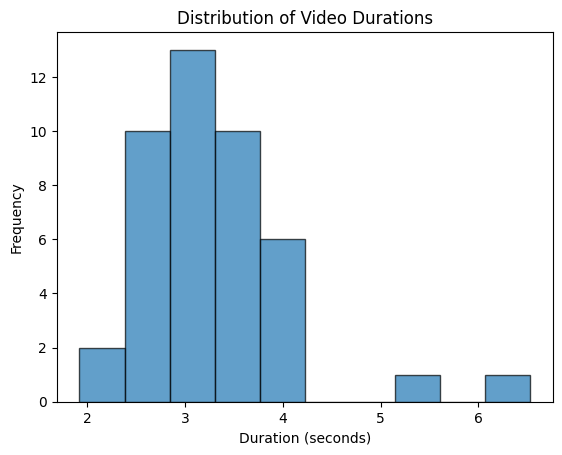

In [12]:
durations = [frame / fps for frame, fps in zip(frame_counts, fps_list)]

# Plot histogram of video durations
plt.hist(durations, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

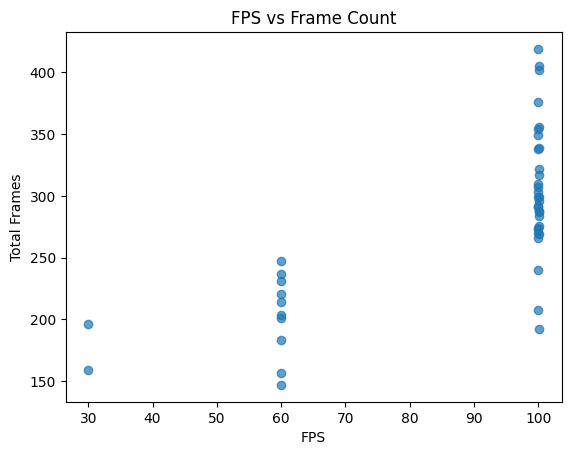

In [13]:
plt.scatter(fps_list, frame_counts, alpha=0.7)
plt.title('FPS vs Frame Count')
plt.xlabel('FPS')
plt.ylabel('Total Frames')
plt.show()